# Importing all necessary libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing the dataset and checking null values

In [2]:
df = pd.read_csv('/Users/himanshukumarsingh/Downloads/internship/CodSoft/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### There are no null values in the data ie. the data is already cleaned.

# Data Visualisation on given dataset

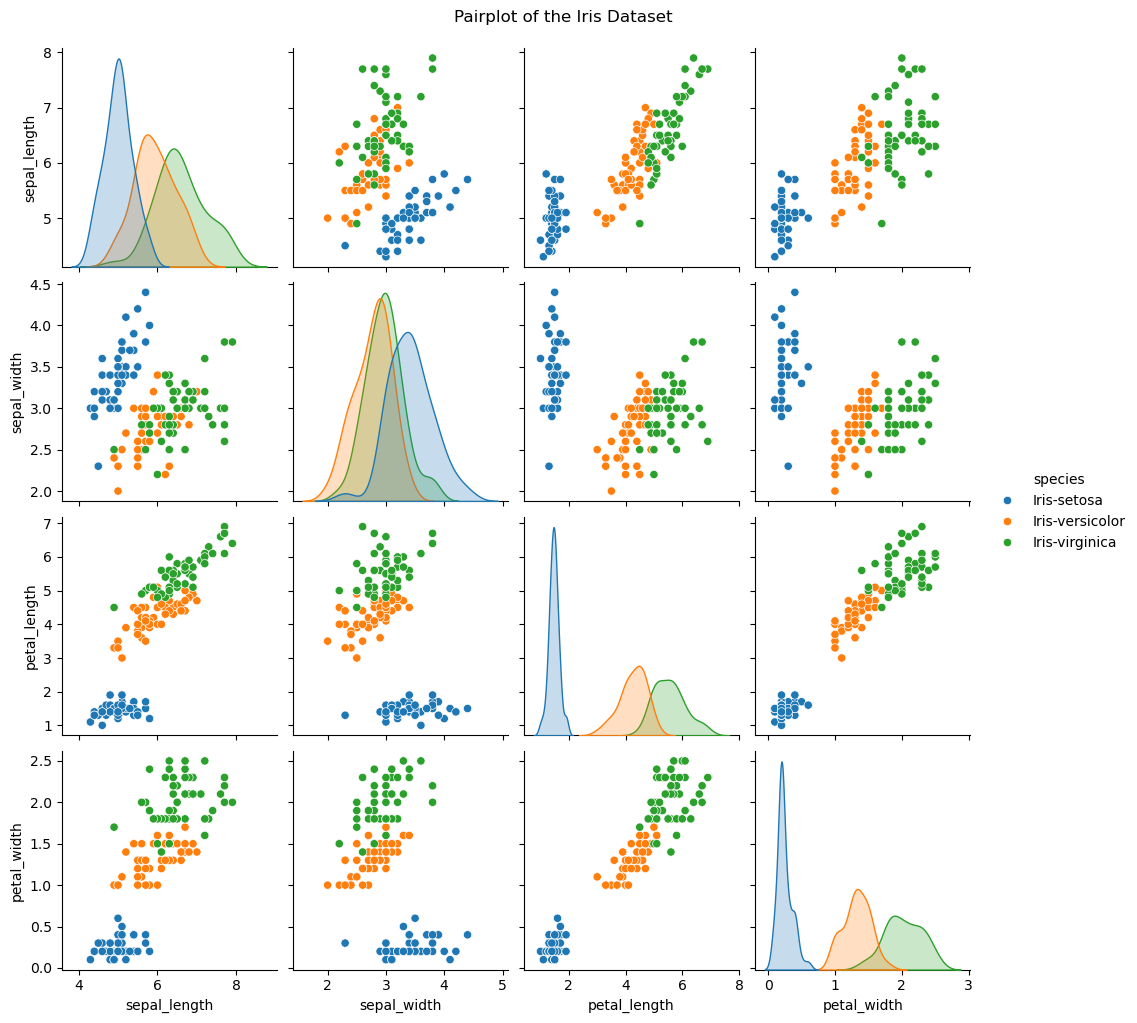

In [7]:
# Pairplot to visualize pairwise relationships
sns.pairplot(df, hue="species")
plt.suptitle('Pairplot of the Iris Dataset', y=1.02)
plt.show()

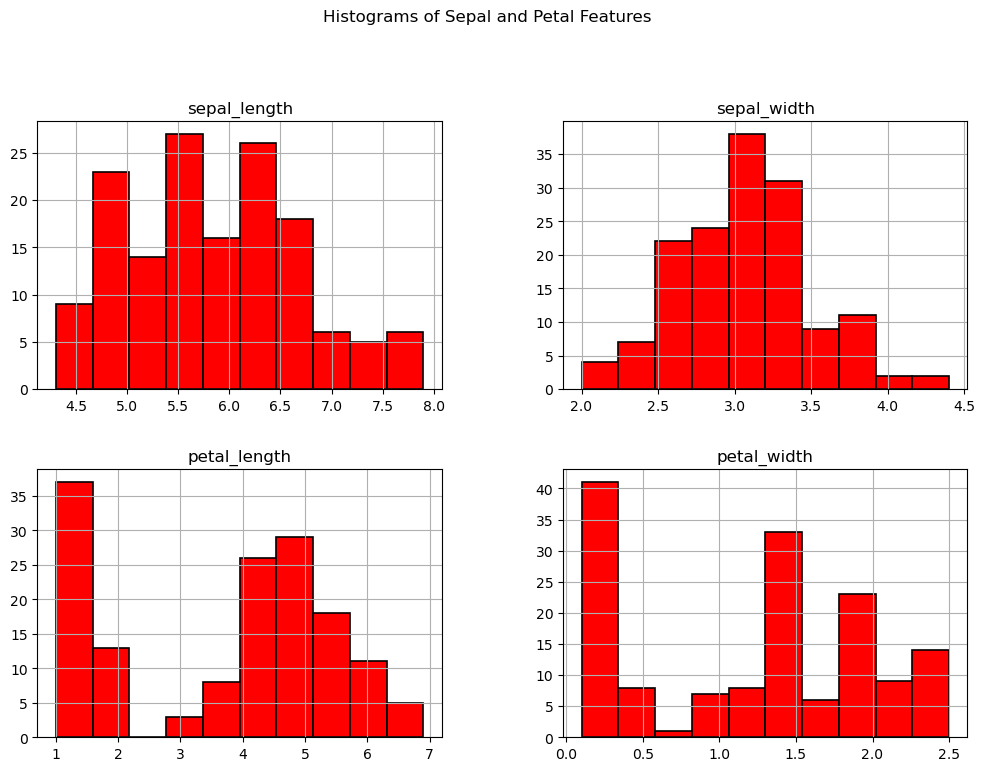

In [12]:
# Histograms for each feature
df.hist(color = 'red', edgecolor='black', linewidth=1.2, figsize=(12, 8))
plt.suptitle('Histograms of Sepal and Petal Features', y=1.02)
plt.show()

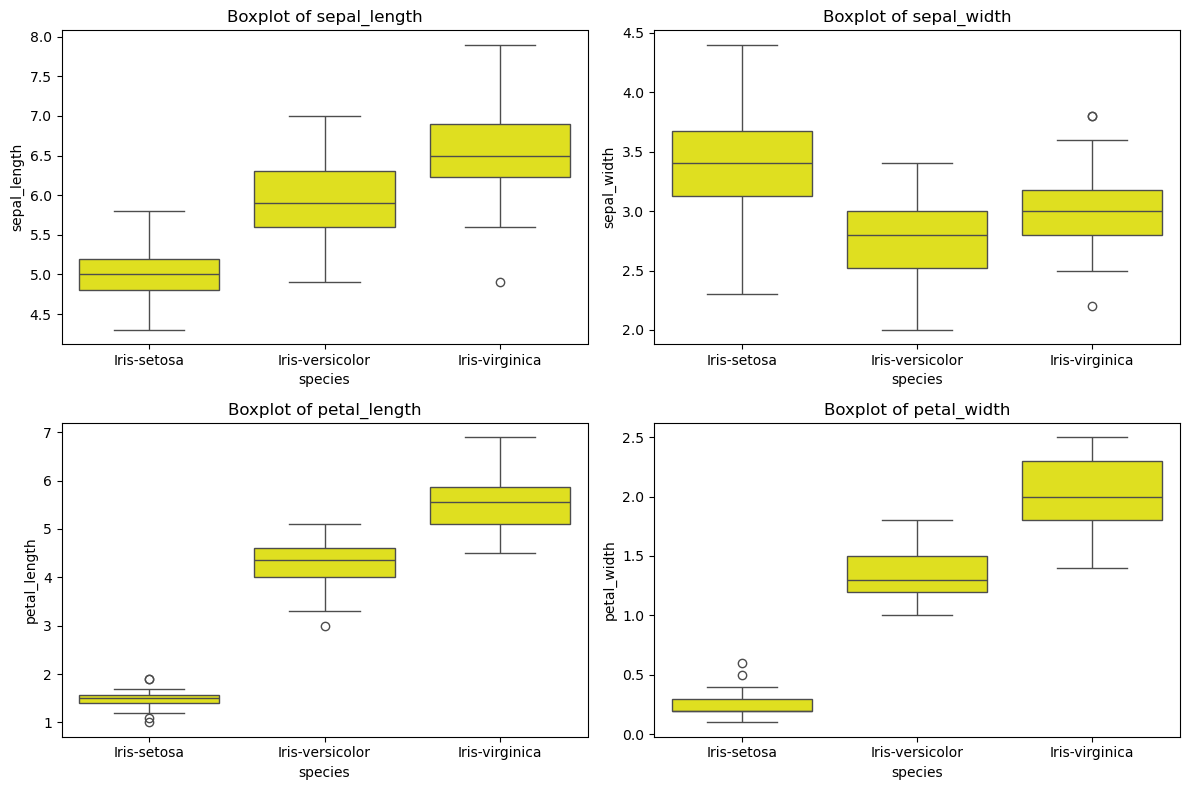

In [13]:
# Boxplots for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=df, color = 'yellow')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Feature Engineering

In [17]:
# converting the categorical target to numerical form
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [23]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [33]:
# deciding input and target variable
X = df.drop('species', axis = 1)
y = df['species']

In [34]:
# dividing the data into training and testing part
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [35]:
# normalising the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# fitting a Random Forest on given data
model = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_leaf = 5, min_samples_split = 8, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=8,
                       random_state=42)

In [37]:
# making predictions
y_pred = model.predict(X_test)

In [40]:
# evaluating the model
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Classification report\n", classification_report(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))

Accuracy =  0.9210526315789473
Classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

Confusion matrix
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]


# Performance Summary:

##	•	Accuracy: 
###     The model achieved an accuracy of approximately 92.1%, meaning it correctly classified about 92% of the test samples.
##	•	Precision, Recall, F1-Score:
###		Class 0 (Setosa): Perfect performance with a precision, recall, and F1-score of 1.00, indicating that the model correctly identified all instances of this class without any errors.
###		Class 1 (Versicolor): The model performed well with a precision of 0.86 and recall of 0.92, leading to an F1-score of 0.89. It indicates a slight bias towards underclassifying this species.
###		Class 2 (Virginica): With a precision of 0.92 and a recall of 0.85, the model shows some misclassification, but it still performed reasonably well with an F1-score of 0.88.

# Confusion Matrix Analysis:

###	•	Class 0 (Setosa): All 12 instances were correctly classified, with no misclassifications.
###	•	Class 1 (Versicolor): Out of 13 instances, 12 were correctly classified, but 1 instance was mistakenly classified as Class 2 (Virginica).
###	•	Class 2 (Virginica): Out of 13 instances, 11 were correctly classified, but 2 instances were misclassified as Class 1 (Versicolor).

# Conclusion:

### The Random Forest model generally performs well, particularly with Class 0 (Setosa) where it achieves perfect classification. The slight misclassification between Class 1 (Versicolor) and Class 2 (Virginica) suggests that these two classes have more overlapping features, leading to some confusion in the model. Despite this, the overall performance is strong, making the model suitable for classifying iris species with a high degree of accuracy.